<a href="https://colab.research.google.com/github/farahjbara/FACE-DETECTION-APPLICATION/blob/main/Lab2_Face_Detection_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as  np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
from skimage import feature

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people()
positive_patches = faces.images

In [ ]:
print (positive_patches.shape)

(13233, 62, 47)


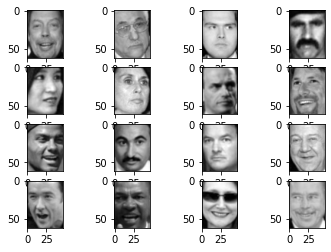

In [ ]:
for i in range (16):
  plt.subplot(4,4,i+1),
  plt.imshow(positive_patches[i,:,:], cmap='gray')

In [ ]:
#@title Titre par défaut
from skimage import color, feature
import skimage.data
img = color.rgb2gray(positive_patches[5])
 #choose a sample here!
hog_vec, hog_vis = feature.hog(img, orientations=8, pixels_per_cell=(16, 16),
                cells_per_block=(1, 1), visualize=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


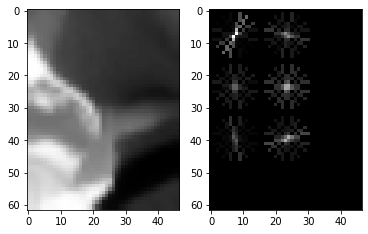

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(hog_vis, cmap='gray')
dim = hog_vec.shape[0]

In [ ]:
from skimage import data, transform
from sklearn.feature_extraction.image import PatchExtractor
imgs_to_use = ['camera', 'text', 'coins', 'moon', 'page', 'clock', 'immunohistochemistry', 'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)()) for name in imgs_to_use]
def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches
negative_patches = np.vstack([extract_patches(im, 1000, scale)
                     for im in images for scale in [0.5, 1.0, 2.0]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


In [ ]:
print(negative_patches.shape)

(30000, 62, 47)


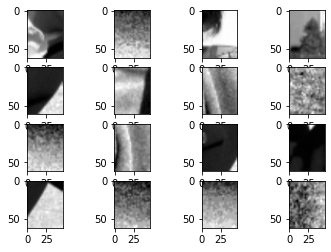

In [ ]:
for i in range (16):
  plt.subplot(4,4,i+1),
  plt.imshow(negative_patches[i,:,:], cmap='gray')

In [ ]:
N=min(positive_patches.shape[0],negative_patches.shape[0])
X=np.zeros((2*N,dim)) #data
for i in range (N):
  img= positive_patches[i,:,:]
  img_gray = color.rgb2gray(img)
  hog_vec = feature.hog(img_gray)
  print(hog_vec.shape)
  X[i,:]= hog_vec.reshape((1,dim))
  #Y.append(1)


Y = np.concatenate((np.ones((N,1)), np.zeros((N,1))), axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1215,)
(1

In [ ]:
x=np.zeros((2*N,dim))
N=min(positive_patches.shape[0],negative_patches.shape[0])
for i in range (N) :
  img=positive_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  x[i,:]=hog_vec.reshape((1,dim))
 
  y= np.concatenate((np.ones((N,1)),np.zeros((N,1))),axis=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


In [ ]:
x=np.zeros((2*N,dim))
N=min(positive_patches.shape[0],negative_patches.shape[0])
for i in range (N) :
  img=negative_patches[i,:,:]
  img_gray=color.rgb2gray(img)
  hog_vec=feature.hog(img_gray)
  x[i+N,:]=hog_vec.reshape((1,dim))
 
  y= np.concatenate((np.ones((N,1)),np.zeros((N,1))),axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """


In [ ]:
print(x.shape)

(26466, 1215)


In [ ]:
print(y.shape)

(26466, 1)


**Binary Classification using Scikit-Learn**


In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# View the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((21172, 1215), (5294, 1215), (21172, 1), (5294, 1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
models = [
    { "estimater": KNeighborsClassifier(),
      "params": {
           "n_neighbors": [25],#30,35,45,5],
           "weights": ['uniform'],#,'distance'],
           "leaf_size":[25],#,30,35],
           "p": [1]#,2,3],
        }
    },
    { "estimater": DecisionTreeClassifier(),
      "params": {
          "criterion": ['gini'],#'entropy'],
           "splitter": ['best'],#'random'],
           "max_depth": [None],#,95,100],
           "max_features": [None],# "auto","sqrt","log2"],
           "random_state": [42],
     }
    },
 
    { "estimater": svm.SVC(),
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
    }
  },
 { "estimater": RandomForestClassifier(),
   "params": {
   "criterion": ['gini'],#'entropy'],
    "bootstrap": [True],# False],
    "max_depth": [85],#90,95,100],
    "max_features": ['sqrt'],#'log2'],
    "n_estimators": [60],# 80, 90],
    "random_state": [42],
 }
 }
]
column_names = ["KNeighbors","DecisionTree", "SVM", "RF"]
entries = [],
max_acc = 0,
best_model = None,
for model in models:
 print(model["estimater"])

 # Create model
 clf = model["estimater"]
 # Instantiate the grid search model
 grid_search = GridSearchCV(estimator = clf, param_grid = model["params"],
 cv = 5)
 
 # Fit the model
 grid_search.fit(X_train, y_train);
 # Make predictions on the test set compute accuracy metric
 predicted = grid_search.predict(X_test)
 acc = accuracy_score(predicted, y_test)
 entries.append(acc)
 print(grid_search.best_params_)
 # Get the best model with the highest accuracy
 if acc > max_acc:
    max_acc = acc
    best_model = grid_search

KNeighborsClassifier()


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

AttributeError: ignored